In [1]:
from os import path
import numpy as np
import matplotlib.pyplot as plt
from enmspring.graph_decompose import Bar4PlotBackbone
from enmspring.graphs import BackboneRibose
from enmspring.vmddraw import BackboneWholeMolecule
rootfolder = '/home/yizaochen/codes/dna_rna/fluctmatch_sequence'

### Part 1: Initialize

In [2]:
host = 'a_tract_21mer'
g_agent = BackboneRibose(host, rootfolder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists


#### Check $\lambda_i=q_i^{T}\textbf{A}q_i + q_i^{T}\textbf{D}q_i$

In [ ]:
sele_id = 1
eigvalue = g_agent.get_eigenvalue_by_id(sele_id)
q = g_agent.get_eigenvector_by_id(sele_id)
A = g_agent.adjacency_mat
D = g_agent.degree_mat
eigvalue_from_decomp = np.dot(q.T, np.dot(A, q)) + np.dot(q.T, np.dot(D, q))
print(f'The {sele_id}-th eigenvalue is: {eigvalue:.3f}')
print(f'The {sele_id}-th eigenvalue from decompose is: {eigvalue_from_decomp:.3f}')

### Part 2: Bar-Plot for 4 hosts

In [2]:
b_agent = Bar4PlotBackbone(rootfolder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/a_tract_21mer/bdna+bdna/pd_dfs exists
Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 456
There are 228 eigenvectors belonging to STRAND1.
There are 228 eigenvectors belonging to STRAND2.
Sum of two strands: 456
/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 456
There are 228 eigenvectors belonging to STRAND1.
There are 228 eigenvectors belonging to STRAND2.
Sum of two strands: 456


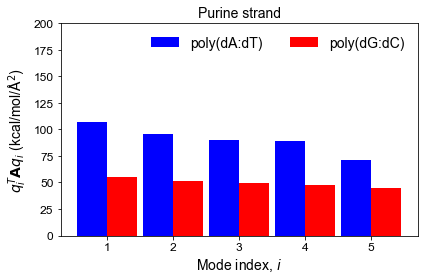

In [30]:
figsize = (6, 4)
small_width = 1
big_width = 1.2
n_modes = 5
strandid = 'STRAND1' # 'STRAND1' or 'STRAND2'

b_agent.plot_main(figsize, small_width, big_width, n_modes, strandid)
plt.tight_layout()
plt.savefig('backbone_qTAq_purine_strand.png', dpi=300)
plt.show()

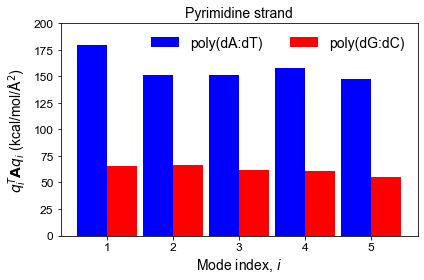

In [31]:
figsize = (6, 4)
small_width = 1
big_width = 1.2
n_modes = 5
strandid = 'STRAND2' # 'STRAND1' or 'STRAND2'

b_agent.plot_main(figsize, small_width, big_width, n_modes, strandid)
plt.tight_layout()
plt.savefig('backbone_qTAq_pyrimidine_strand.png', dpi=300)
plt.show()

### Part 3: Show edges in molecule for a specific mode

In [73]:
host = 'g_tract_21mer'
g_agent = BackboneRibose(host, rootfolder)
g_agent.pre_process()

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Thare are 456 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 456
There are 228 eigenvectors belonging to STRAND1.
There are 228 eigenvectors belonging to STRAND2.
Sum of two strands: 456


In [114]:
strandid = 'STRAND2' # 'STRAND1' or 'STRAND2'
eigv_id = 5
df = g_agent.get_df_qTAq_for_vmd_draw(eigv_id, strandid)
df.head()

,Strand_i,Resid_i,Atomname_i,Strand_j,Resid_j,Atomname_j,qTAq
0,STRAND1,1,C5',STRAND1,2,O2P,0.0
1,STRAND1,1,C4',STRAND1,2,O5',0.0
2,STRAND1,1,C1',STRAND1,2,O5',0.0
3,STRAND1,1,C3',STRAND1,2,C5',0.0
4,STRAND1,1,C2',STRAND1,2,O1P,0.0


In [115]:
filter_criteria = 1e-3
mask = df['qTAq'] > filter_criteria
df1 = df[mask]
print(f'There are {df1.shape[0]} bonds left.')

There are 11 bonds left.


### Part 4: Use DataFrame obtained above to draw important bonds on VMD

In [116]:
pic_out_folder = '/home/yizaochen/Desktop/dna_slide_202102'
draw_agent = BackboneWholeMolecule(host, rootfolder, pic_out_folder)

/home/yizaochen/codes/dna_rna/fluctmatch_sequence/g_tract_21mer/bdna+bdna/pd_dfs exists
Read Dataframe of stacking: df_st
Thare are 399 nodes.
Initialize adjacency, degree and Laplacian matrices... Done.
Finish the setup for Laplaican matrix.
Total number of nodes: 399
There are 231 eigenvectors belonging to STRAND1.
There are 168 eigenvectors belonging to STRAND2.
Sum of two strands: 399
/home/yizaochen/Desktop/dna_slide_202102/mol_structure exists


In [117]:
radius = 0.2
draw_agent.vmd_show_whole_backbone(df1, radius, eigv_id, strandid)

vmd -gro /home/yizaochen/codes/dna_rna/all_systems/g_tract_21mer/bdna+bdna/input/allatoms/bdna+bdna.perfect.gro
source /home/yizaochen/codes/dna_rna/enmspring/tclscripts/show_backbone_pair.tcl
/home/yizaochen/Desktop/dna_slide_202102/mol_structure/g_tract_21mer_backbone_STRAND2_5
